In [1]:
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
datadir = 'snacks'
CATEGORIES = ['Boli(bole)', 'Chin Chin','Meat-pie', 'Puff-Puff', 'Suya']
os.listdir(datadir)

['Boli(bole)', 'Chin Chin', 'Meat-pie', 'Puff-Puff', 'Suya']

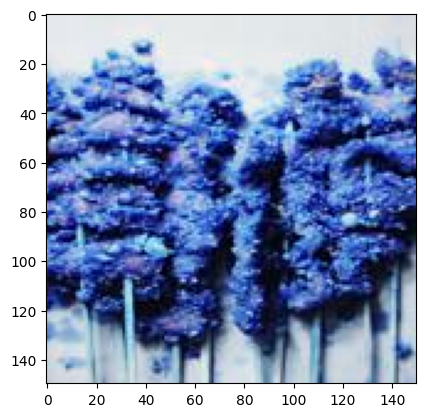

In [6]:
for categories in CATEGORIES:
    folder = os.path.join(datadir, categories) # path to foods dir
    for img in os.listdir(folder):
        img = os.path.join(folder,img)
        img_array = cv2.imread(img)
        plt.imshow(img_array)
        
        break

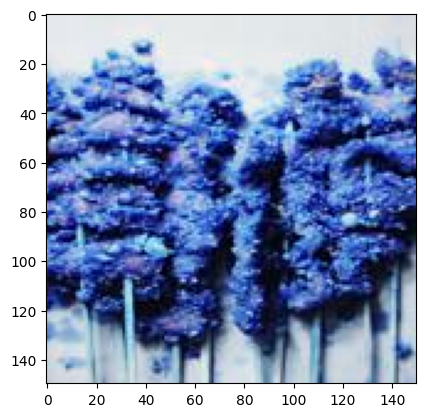

In [7]:
img_size = 150

narray = cv2.resize(img_array,(img_size, img_size))
plt.imshow(narray)
plt.show()

In [8]:
training_data = []

def create_training_data():
    for categories in CATEGORIES:
        folder = os.path.join(datadir, categories) # path to foods dir
        class_num = CATEGORIES.index(categories)
        for img in os.listdir(folder):
            try:
                img = os.path.join(folder,img)
                img_array = cv2.imread(img)
                narray = cv2.resize(img_array,(img_size, img_size))
                training_data.append([narray, class_num])
            except Exception as e:
                pass
create_training_data()

In [9]:
print(len(training_data))

1823


In [27]:
import random

random.shuffle(training_data)

In [28]:
for sample in training_data[:5]:
    print(sample[1])

4
2
3
2
0


In [29]:
x=[]
y=[]

for features, label in training_data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [30]:
import pickle

pickle_out = open('x.pickle', 'wb')
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [31]:
import pickle
from tensorflow.keras.layers import Activation

x= pickle.load(open('x.pickle', 'rb'))
y= pickle.load(open('y.pickle', 'rb'))

x=x/255.0

In [32]:
x.shape

(1823, 150, 150, 3)

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping

callbacks = [ModelCheckpoint('.naij.hdf5', monitor='val_loss',verbose=1, save_best_only=True)]

In [34]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(18, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer ='adam',
              metrics=['accuracy'])

model.fit(x,y, epochs = 40, validation_split = 0.1, callbacks = callbacks)



Epoch 1/40
52/52 [==============================] - ETA: 0s - loss: 1.5176 - accuracy: 0.3738
Epoch 1: val_loss improved from inf to 1.38376, saving model to .mdl_wts.hdf5
52/52 [==============================] - 6s 70ms/step - loss: 1.5176 - accuracy: 0.3738 - val_loss: 1.3838 - val_accuracy: 0.4044
Epoch 2/40
52/52 [==============================] - ETA: 0s - loss: 1.0307 - accuracy: 0.6110
Epoch 2: val_loss improved from 1.38376 to 0.86068, saving model to .mdl_wts.hdf5
52/52 [==============================] - 3s 54ms/step - loss: 1.0307 - accuracy: 0.6110 - val_loss: 0.8607 - val_accuracy: 0.6721
Epoch 3/40
52/52 [==============================] - ETA: 0s - loss: 0.7326 - accuracy: 0.7378
Epoch 3: val_loss improved from 0.86068 to 0.76412, saving model to .mdl_wts.hdf5
52/52 [==============================] - 3s 53ms/step - loss: 0.7326 - accuracy: 0.7378 - val_loss: 0.7641 - val_accuracy: 0.7377
Epoch 4/40
51/52 [============================>.] - ETA: 0s - loss: 0.5038 - accuracy:

In [ ]:
labels = ['Abacha and Ugba(african salad)', 'Akara and Eko', 'Amala and Gbegiri- Ewedu', 'Asaro', 'Boli(bole)', 'Chin Chin', 'Egusi Soup' ,'Ewa-Agoyin','Fried Plantains (dodo)', 'Jollof Rice', 'Meat-pie', 'Moin-Moin', 'Nkwobi', 'Okro Soup', 'Pepper Soup', 'Puff-Puff', 'Suya',  'Vegetable Soup']